<a href="https://colab.research.google.com/github/rxhith/Deep-Learning-Lab/blob/main/Experiment%206-%20Optimizer%20Analysis/optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

313/313 [==============================] - 1s 2ms/step - loss: 0.0796 - accuracy: 0.9783
Test Accuracy with adam: 0.98
313/313 [==============================] - 1s 2ms/step - loss: 0.1620 - accuracy: 0.9521
Test Accuracy with sgd: 0.95
313/313 [==============================] - 1s 2ms/step - loss: 0.0833 - accuracy: 0.9788
Test Accuracy with rmsprop: 0.98


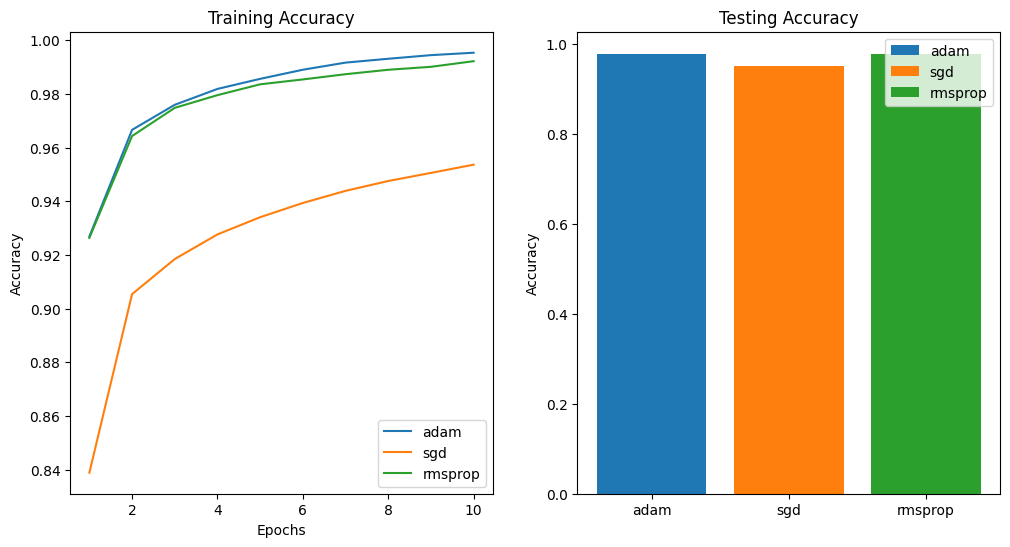

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

# Define a list of optimizers to experiment with
optimizers_list = ['adam', 'sgd', 'rmsprop']

# Create a dictionary to store the training and test accuracy for each optimizer
accuracy_dict = {'train': {}, 'test': {}}

for optimizer_name in optimizers_list:
    # Build the model
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    # Compile the model with the selected optimizer
    model.compile(optimizer=optimizer_name, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(train_images, train_labels, epochs=10, verbose=0)

    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(test_images, test_labels)
    print(f"Test Accuracy with {optimizer_name}: {test_accuracy:.2f}")

    # Save training accuracy for later comparison
    accuracy_dict['train'][optimizer_name] = history.history['accuracy']

    # Save test accuracy for later comparison
    accuracy_dict['test'][optimizer_name] = test_accuracy

# Plot training and testing accuracy separately
plt.figure(figsize=(12, 6))

# Plot training accuracy
plt.subplot(1, 2, 1)
for optimizer_name, acc_values in accuracy_dict['train'].items():
    plt.plot(np.arange(1, 11), acc_values, label=optimizer_name)

plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot testing accuracy
plt.subplot(1, 2, 2)
for optimizer_name, test_acc in accuracy_dict['test'].items():
    plt.bar(optimizer_name, test_acc, label=optimizer_name)

plt.title('Testing Accuracy')
plt.ylabel('Accuracy')
plt.legend()

plt.show()